In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
MAIN_LABEL = "User"
DATA_FOLDER = "Data"

In [3]:
#Aggregate all the data

train_data_dir = os.path.join(os.path.abspath(".."), DATA_FOLDER)

all_files_df = []

for file in os.listdir(train_data_dir):
    if file.endswith(".csv"):
        file_path = os.path.join(train_data_dir, file)
        temp_df = pd.read_csv(file_path)
        temp_df['label'] = file.split(".")[0].split("_")[-1]
        all_files_df.append(temp_df)

if all_files_df:
    data_aggregated = pd.concat(all_files_df, ignore_index=True)
else:
    data_aggregated = pd.DataFrame()

print(f"Total rows loaded: {len(data_aggregated)}")
print(f"Total columns: {data_aggregated.shape[1]}")
print("\nFirst 5 rows of aggregated data:")
print(data_aggregated.head())

Total rows loaded: 13251
Total columns: 14

First 5 rows of aggregated data:
           key  start_time  key_per_second      combination  error  \
0  Key.shift_r    0.000000        0.000000              NaN  False   
1          'T'    0.094081       21.258294  KEY.SHIFT_R,'T'  False   
2          'h'    0.251984       11.905523              NaN  False   
3          'e'    0.347874       11.498419              NaN  False   
4    Key.space    0.459523       10.880849              NaN  False   

   start_time_timestamp  seek_time  error_rate  accuracy  end_time  hold_time  \
0          1.758045e+09   0.000000         0.0       1.0  0.129991   0.129991   
1          1.758045e+09   0.094081         0.0       1.0  0.174486   0.080405   
2          1.758045e+09   0.077497         0.0       1.0  0.347874   0.095890   
3          1.758045e+09   0.000000         0.0       1.0  0.443911   0.096037   
4          1.758045e+09   0.015612         0.0       1.0  0.537897   0.078374   

   end_time_tim

In [4]:
data_aggregated

,key,start_time,key_per_second,combination,error,start_time_timestamp,seek_time,error_rate,accuracy,end_time,hold_time,end_time_timestamp,language,label
0,Key.shift_r,0.000000,0.000000,NaN,False,1.758045e+09,0.000000,0.000000,1.000000,0.129991,0.129991,1.758045e+09,Hungarian,User
1,'T',0.094081,21.258294,"KEY.SHIFT_R,'T'",False,1.758045e+09,0.094081,0.000000,1.000000,0.174486,0.080405,1.758045e+09,Hungarian,User
2,'h',0.251984,11.905523,NaN,False,1.758045e+09,0.077497,0.000000,1.000000,0.347874,0.095890,1.758045e+09,Hungarian,User
3,'e',0.347874,11.498419,NaN,False,1.758045e+09,0.000000,0.000000,1.000000,0.443911,0.096037,1.758045e+09,Hungarian,User
4,Key.space,0.459523,10.880849,NaN,False,1.758045e+09,0.015612,0.000000,1.000000,0.537897,0.078374,1.758045e+09,Hungarian,User
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,Key.space,8.786724,5.235171,NaN,False,1.761085e+09,0.026694,0.086957,0.913043,8.868474,0.081749,1.761085e+09,Hungarian,Anomaly2
13247,'t',8.955638,5.248091,NaN,True,1.761085e+09,0.087164,0.104167,0.895833,9.094560,0.138922,1.761085e+09,Hungarian,Anomaly2
13248,Key.backspace,9.416808,5.097269,NaN,False,1.761085e+09,0.322248,0.083333,0.916667,9.519837,0.103029,1.761085e+09,Hungarian,Anomaly2
13249,'d',9.536344,5.138238,NaN,False,1.761085e+09,0.016507,0.102041,0.897959,9.677486,0.141143,1.761085e+09,Hungarian,Anomaly2


In [5]:
#Drop language if available, we don't use it currently
data_aggregated = data_aggregated.drop(columns="language")

In [6]:
#Separate the data to normal and anomaly
normal_data = data_aggregated[data_aggregated['label'] == MAIN_LABEL].reset_index(drop=True)
anomaly_data = data_aggregated[data_aggregated['label'] != MAIN_LABEL].reset_index(drop=True)

In [7]:
normal_data

,key,start_time,key_per_second,combination,error,start_time_timestamp,seek_time,error_rate,accuracy,end_time,hold_time,end_time_timestamp,label
0,Key.shift_r,0.000000,0.000000,NaN,False,1.758045e+09,0.000000,0.000000,1.000000,0.129991,0.129991,1.758045e+09,User
1,'T',0.094081,21.258294,"KEY.SHIFT_R,'T'",False,1.758045e+09,0.094081,0.000000,1.000000,0.174486,0.080405,1.758045e+09,User
2,'h',0.251984,11.905523,NaN,False,1.758045e+09,0.077497,0.000000,1.000000,0.347874,0.095890,1.758045e+09,User
3,'e',0.347874,11.498419,NaN,False,1.758045e+09,0.000000,0.000000,1.000000,0.443911,0.096037,1.758045e+09,User
4,Key.space,0.459523,10.880849,NaN,False,1.758045e+09,0.015612,0.000000,1.000000,0.537897,0.078374,1.758045e+09,User
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4332,'t',7.111499,6.468397,NaN,False,1.761079e+09,0.310079,0.086957,0.913043,7.197957,0.086458,1.761079e+09,User
4333,'h',7.263364,6.470831,NaN,False,1.761079e+09,0.065407,0.085106,0.914894,7.360866,0.097502,1.761079e+09,User
4334,'e',7.367068,6.515482,NaN,False,1.761079e+09,0.006202,0.083333,0.916667,7.466149,0.099081,1.761079e+09,User
4335,'m',7.476091,6.554228,NaN,False,1.761079e+09,0.009942,0.081633,0.918367,7.549299,0.073209,1.761079e+09,User


In [8]:
anomaly_data

,key,start_time,key_per_second,combination,error,start_time_timestamp,seek_time,error_rate,accuracy,end_time,hold_time,end_time_timestamp,label
0,Key.enter,0.000000,0.000000,NaN,False,1.758045e+09,0.000000,0.000000,1.000000,0.057008,0.057008,1.758045e+09,Anomaly1
1,Key.shift_r,1.163901,1.718359,NaN,False,1.758045e+09,1.106893,0.000000,1.000000,1.622159,0.458258,1.758045e+09,Anomaly1
2,'T',1.536538,1.952442,"'T',KEY.SHIFT_R",False,1.758045e+09,0.372637,0.000000,1.000000,1.643228,0.106691,1.758045e+09,Anomaly1
3,'h',2.054649,1.946804,NaN,False,1.758045e+09,0.411421,0.000000,1.000000,2.134424,0.079775,1.758045e+09,Anomaly1
4,'e',2.548181,1.962184,NaN,False,1.758045e+09,0.413756,0.000000,1.000000,2.623500,0.075320,1.758045e+09,Anomaly1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8909,Key.space,8.786724,5.235171,NaN,False,1.761085e+09,0.026694,0.086957,0.913043,8.868474,0.081749,1.761085e+09,Anomaly2
8910,'t',8.955638,5.248091,NaN,True,1.761085e+09,0.087164,0.104167,0.895833,9.094560,0.138922,1.761085e+09,Anomaly2
8911,Key.backspace,9.416808,5.097269,NaN,False,1.761085e+09,0.322248,0.083333,0.916667,9.519837,0.103029,1.761085e+09,Anomaly2
8912,'d',9.536344,5.138238,NaN,False,1.761085e+09,0.016507,0.102041,0.897959,9.677486,0.141143,1.761085e+09,Anomaly2


In [9]:
def add_missing_hold_end_times(df):
    '''
    Function to add the missing hold times and end times (When we ended the loggings between thresholds the last one is missing sometimes)
    '''
    # Get the indexes
    nan_hold_time_idx = df[df['hold_time'].isna()].index
    last_idx = df.index[-1]
    
    # If there are no missing hold times, we check the end times
    if not nan_hold_time_idx.empty:
        for idx in nan_hold_time_idx:
            # Handle the last element separately to prevent KeyError
            if idx == last_idx:
                if idx > 0:
                    prev_val = df.loc[idx - 1, 'hold_time']
                    df.loc[idx, 'hold_time'] = prev_val
                continue

            prev_val = df.loc[idx - 1, 'hold_time']
            next_val = df.loc[idx + 1, 'hold_time']
            df.loc[idx, 'hold_time'] = (prev_val + next_val) / 2

    # Deal with end times
    nan_end_time_idx = df[df['end_time'].isna()].index
    
    # Check to make sure there are missing end times before continuing.
    if not nan_end_time_idx.empty:
        for idx in nan_end_time_idx:
            # Handle the last element separately to prevent KeyError
            if idx == last_idx:
                if idx > 0:
                    prev_val = df.loc[idx - 1, 'end_time']
                    df.loc[idx, 'end_time'] = prev_val
                continue
            
            prev_val = df.loc[idx - 1, 'end_time']
            next_val = df.loc[idx + 1, 'end_time']

            # Apply the new condition: if next value is smaller than previous, make it 0
            if next_val < prev_val:
                df.loc[idx, 'end_time'] = 0
            else:
                # Otherwise, apply the original rule: add the next end time to the previous
                df.loc[idx, 'end_time'] = prev_val + next_val
    
    return df

normal_data = add_missing_hold_end_times(normal_data)
anomaly_data = add_missing_hold_end_times(anomaly_data)

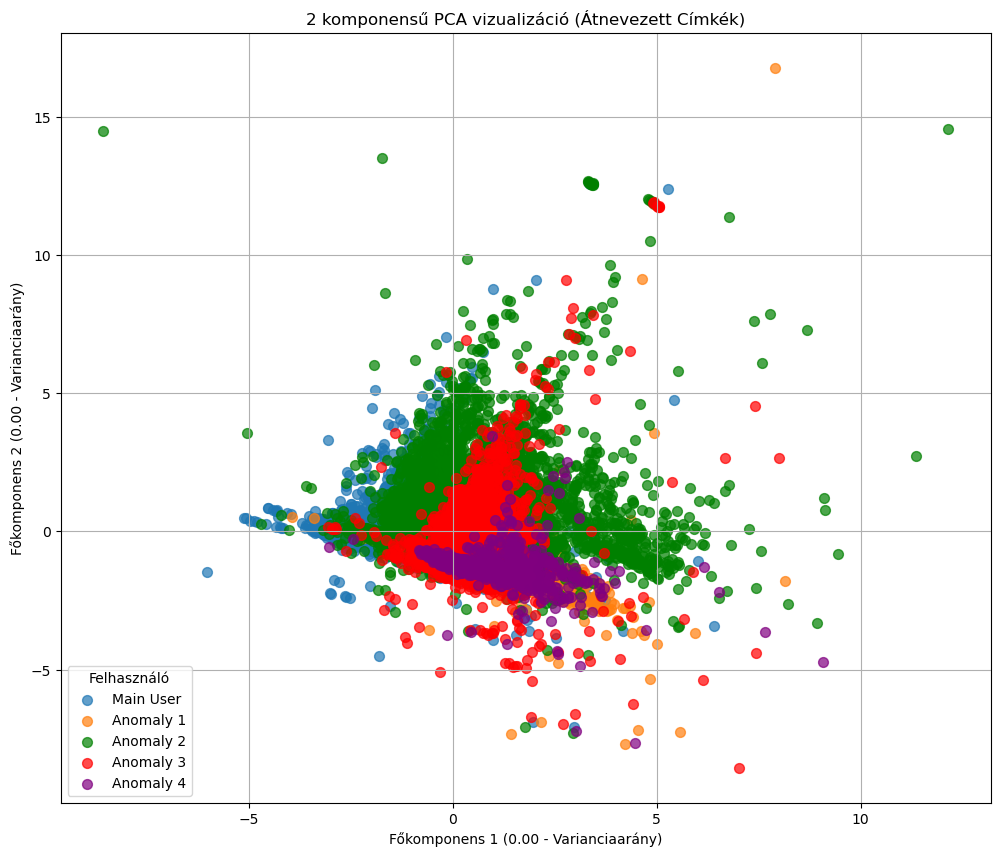

(PCA(n_components=2),
 array([[-1.11905606, -0.3708747 , -0.24145818, ..., -0.00868744,
         -0.00868744, -0.00868744],
        [-1.10132351,  0.81234602, -0.24145818, ..., -0.00868744,
         -0.00868744, -0.00868744],
        [-1.07156167,  0.2917778 , -0.24145818, ..., -0.00868744,
         -0.00868744, -0.00868744],
        ...,
        [ 0.65584133, -0.08716455, -0.24145818, ..., -0.00868744,
         -0.00868744, -0.00868744],
        [ 0.67837168, -0.08488425, -0.24145818, ..., -0.00868744,
         -0.00868744, -0.00868744],
        [ 0.69266286, -0.0813497 , -0.24145818, ..., -0.00868744,
         -0.00868744, -0.00868744]]),
 0            User
 1            User
 2            User
 3            User
 4            User
            ...   
 13246    Anomaly2
 13247    Anomaly2
 13248    Anomaly2
 13249    Anomaly2
 13250    Anomaly2
 Name: label, Length: 13251, dtype: object)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(data_df, label_column, n_components = 2):
    """
    PCA Analisis to represent the data and all its collumns
    """
    
    #If there are no labels, we return nothing
    if label_column not in data_df.columns:
        return None, None, None
        
    y = data_df[label_column]
    X = data_df.drop(columns=[label_column])

    #One-Hot Encoding
    X_encoded = pd.get_dummies(X, dummy_na=False)

    #Fill out NAN values
    X_encoded.fillna(X_encoded.mean(), inplace=True)

    #Standardize the data
    scaler = StandardScaler()
    try:
        X_scaled = scaler.fit_transform(X_encoded)
    except Exception as e:
        return None, None, None

    #PCA and Plot
    if n_components > X_scaled.shape[1]:
        n_components = X_scaled.shape[1]
        
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    column_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    X_pca_df = pd.DataFrame(data = X_pca, columns = column_names)
    X_pca_df[label_column] = y.values 

    if X_pca.shape[1] >= 2 and n_components >= 2:
        targets_original = sorted(y.unique().tolist())
        label_mapping = {}
        anomaly_counter = 1

        for target in targets_original:
            if target == MAIN_LABEL:
                label_mapping[target] = 'Main User'
            else:
                label_mapping[target] = f'Anomaly {anomaly_counter}'
                anomaly_counter += 1

        X_pca_df['Display_Label'] = X_pca_df[label_column].map(label_mapping)
        targets_to_plot = sorted(X_pca_df['Display_Label'].unique().tolist(), key=lambda x: (x != 'Main User', x))

        plt.figure(figsize=(12, 10))
        
        #Match the colors for the thesis
        color_sequence = ['#1f77b4', '#ff7f0e', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
        plot_colors = color_sequence[:len(targets_to_plot)]

        for i, target_display_name in enumerate(targets_to_plot):
            indicesToKeep = X_pca_df['Display_Label'] == target_display_name 
            
            plt.scatter(X_pca_df.loc[indicesToKeep, 'PC1'], 
                        X_pca_df.loc[indicesToKeep, 'PC2'], 
                        c = plot_colors[i % len(plot_colors)],
                        s = 50, 
                        label = target_display_name,
                        alpha=0.7)

        plt.xlabel(f'Főkomponens 1 ({pca.explained_variance_ratio_[0]:.2f} - Varianciaarány)')
        plt.ylabel(f'Főkomponens 2 ({pca.explained_variance_ratio_[1]:.2f} - Varianciaarány)')
        plt.title('2 komponensű PCA vizualizáció (Átnevezett Címkék)')
        plt.legend(loc='best', title="Felhasználó")
        plt.grid(True)
        plt.show()

    return pca, X_scaled, y

perform_pca_analysis(data_aggregated, 'label', 2)

In [11]:
def add_cumulative_and_wpm(df):
    '''
    Function to add the cumulative Mean STD etc. And the WPM
    '''
    
    #Convert the timestamps to numeric
    df['start_time_timestamp'] = pd.to_numeric(df['start_time_timestamp'])
    df['end_time_timestamp'] = pd.to_numeric(df['end_time_timestamp'])

    #Fill out missing time differences
    df['time_diff'] = df['start_time_timestamp'].diff().fillna(0)

    #Group bursts based on a 5 second time difference
    df['burst_id'] = (df['time_diff'] > 5.0).cumsum()

    #Get cumulative based on the groups
    df['cumulative_keys'] = df.groupby('burst_id').cumcount() + 1
    df['cumulative_spaces'] = df.groupby('burst_id')['key'].transform(lambda x: (x == 'Key.space').cumsum())

    #Get the elapsed time temporary
    df['elapsed_time_seconds'] = df.groupby('burst_id')['time_diff'].cumsum()

    #Calculate KPS and WPM
    df.loc[:, 'key_per_second'] = df['cumulative_keys'] / df['elapsed_time_seconds'].replace(0, np.nan)
    df.loc[:, 'wpm'] = (df['cumulative_spaces'] / (df['elapsed_time_seconds'] / 60)).replace([np.inf, -np.inf], 0)

    #Fix for thge first event in a typing burst
    first_in_burst = df['burst_id'].diff() != 0
    df.loc[first_in_burst, 'elapsed_time_seconds'] = 0.001
    df.loc[first_in_burst, 'key_per_second'] = df.loc[first_in_burst, 'cumulative_keys'] / df.loc[first_in_burst, 'elapsed_time_seconds']
    df.loc[first_in_burst, 'wpm'] = (df.loc[first_in_burst, 'cumulative_spaces'] / (df.loc[first_in_burst, 'elapsed_time_seconds'] / 60)).replace([np.inf, -np.inf], 0)
    
    return df


normal_data['chunk_id'] = (normal_data['start_time'] == 0).cumsum()
anomaly_data['chunk_id'] = (anomaly_data['start_time'] == 0).cumsum()

normal_data = normal_data.groupby('chunk_id', group_keys=False).apply(add_cumulative_and_wpm)
anomaly_data = anomaly_data.groupby('chunk_id', group_keys=False).apply(add_cumulative_and_wpm)

normal_data = normal_data.drop(columns=['cumulative_keys', 'elapsed_time_seconds', 'cumulative_spaces', 'chunk_id'])
anomaly_data = anomaly_data.drop(columns=['cumulative_keys', 'elapsed_time_seconds', 'cumulative_spaces', 'chunk_id'])

C:\Users\erikp\AppData\Local\Temp\ipykernel_4664\603465672.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  normal_data = normal_data.groupby('chunk_id', group_keys=False).apply(add_cumulative_and_wpm)
C:\Users\erikp\AppData\Local\Temp\ipykernel_4664\603465672.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  anomaly_data = anomaly_data.groupby('chunk_id', group_keys=False).apply(add_cumulative_and_wpm)


In [12]:
def add_ngrams(df):
    '''
    Function to add the Ngram related data
    '''
    df['mean_ngram_dwell_time'] = df['hold_time'].rolling(
        window=3, min_periods=2).mean().fillna(0)
    df['std_ngram_dwell_time'] = df['hold_time'].rolling(
        window=3, min_periods=2).std().fillna(0)

    # Calculate the mean and standard deviation of seek_time over a rolling window.
    df['mean_ngram_flight_time'] = df['seek_time'].rolling(
        window=3, min_periods=2).mean().fillna(0)
    df['std_ngram_flight_time'] = df['seek_time'].rolling(
        window=3, min_periods=2).std().fillna(0)
    
    return df

normal_data = add_ngrams(normal_data)
anomaly_data = add_ngrams(anomaly_data)

In [13]:
def add_rolling_data(df):
    # Add n-gram-based features for hold and seek times
    df['mean_ngram_dwell_time'] = df['hold_time'].rolling(window=3, min_periods=2).mean().fillna(0)
    df['std_ngram_dwell_time'] = df['hold_time'].rolling(window=3, min_periods=2).std().fillna(0)
    df['mean_ngram_flight_time'] = df['seek_time'].rolling(window=3, min_periods=2).mean().fillna(0)
    df['std_ngram_flight_time'] = df['seek_time'].rolling(window=3, min_periods=2).std().fillna(0)

    # Add rolling features for overall speed and consistency
    df['rolling_mean_kps'] = df['key_per_second'].rolling(window=5, min_periods=1).mean().fillna(0)
    df['rolling_std_kps'] = df['key_per_second'].rolling(window=5, min_periods=1).std().fillna(0)
    df['rolling_mean_wpm'] = df['wpm'].rolling(window=5, min_periods=1).mean().fillna(0)
    df['rolling_std_wpm'] = df['wpm'].rolling(window=5, min_periods=1).std().fillna(0)
    
    return df

normal_data = add_rolling_data(normal_data)
anomaly_data = add_rolling_data(anomaly_data)

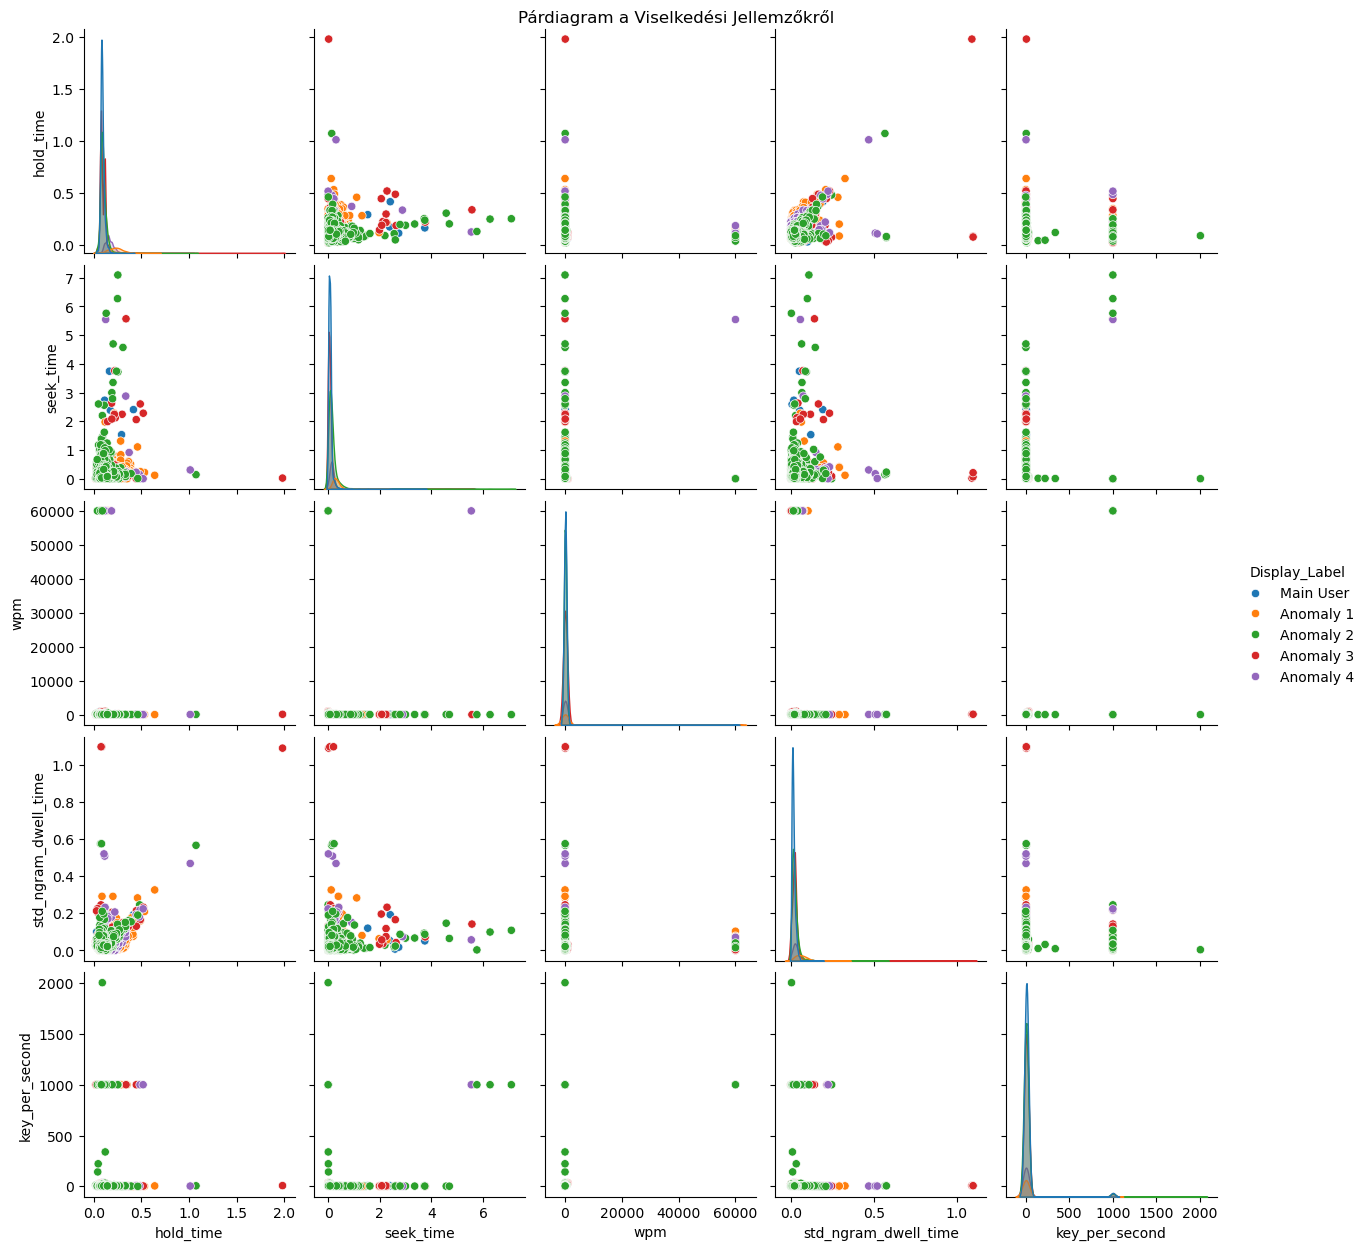

In [14]:
# Combine all data
combined_df = pd.concat([normal_data, anomaly_data], ignore_index=True)

# Select the columns to plot
plot_cols = ['hold_time', 'seek_time', 'wpm', 'std_ngram_dwell_time', 'key_per_second', 'label']

plot_df = combined_df[plot_cols].copy()

targets_original = sorted(plot_df['label'].unique().tolist())
label_mapping = {}
anomaly_counter = 1

for target in targets_original:
    if target == MAIN_LABEL:
        label_mapping[target] = 'Main User'
    else:
        label_mapping[target] = f'Anomaly {anomaly_counter}'
        anomaly_counter += 1

plot_df['Display_Label'] = plot_df['label'].map(label_mapping)
sns.pairplot(plot_df.drop(columns=['label']), hue='Display_Label', diag_kind='kde')

#Display
plt.suptitle('Párdiagram a Viselkedési Jellemzőkről', y=1.00, fontsize=12)
plt.show()

In [15]:
def print_correlation(data):
    corr = data.corr(numeric_only = True)

    print(corr)

    sns.heatmap(corr, cmap="YlGnBu", annot=True)

                        start_time  key_per_second     error  \
start_time                1.000000       -0.170483 -0.015125   
key_per_second           -0.170483        1.000000  0.007001   
error                    -0.015125        0.007001  1.000000   
start_time_timestamp      0.224973       -0.012513  0.004983   
seek_time                 0.060696       -0.081386  0.011217   
error_rate               -0.013553        0.018072  0.290601   
accuracy                  0.013553       -0.018072 -0.290601   
end_time                  0.981988       -0.168906 -0.013169   
hold_time                 0.008901       -0.024278 -0.053714   
end_time_timestamp        0.225399       -0.012467  0.005076   
time_diff                 0.067439       -0.144879  0.010117   
burst_id                       NaN             NaN       NaN   
wpm                      -0.055104        0.322771 -0.008185   
mean_ngram_dwell_time     0.013022       -0.013629 -0.038123   
std_ngram_dwell_time      0.010385      

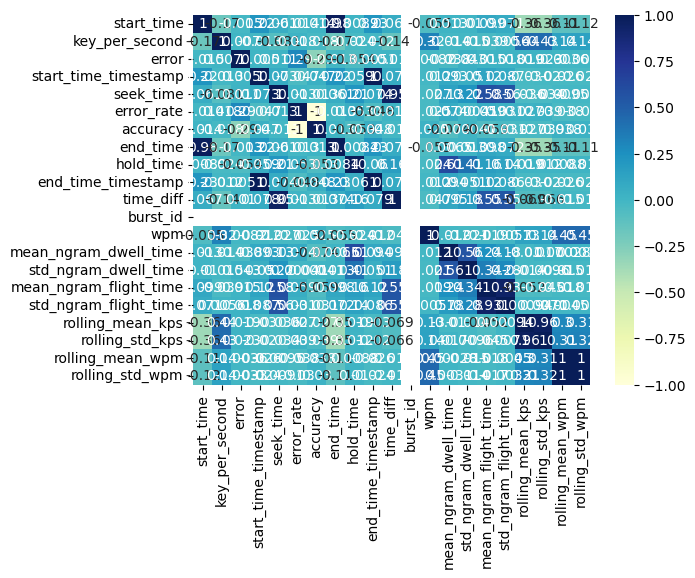

In [16]:
print_correlation(normal_data)

                        start_time  key_per_second     error  \
start_time                1.000000       -0.161384  0.002136   
key_per_second           -0.161384        1.000000  0.020396   
error                     0.002136        0.020396  1.000000   
start_time_timestamp     -0.091331        0.000362 -0.069315   
seek_time                 0.159901        0.023127 -0.011124   
error_rate               -0.013557        0.021184  0.313073   
accuracy                  0.013557       -0.021184 -0.313073   
end_time                  0.994286       -0.160625  0.001429   
hold_time                 0.193745        0.021401 -0.089997   
end_time_timestamp       -0.091296        0.000508 -0.069087   
time_diff                 0.206052       -0.029397 -0.029017   
burst_id                  0.157412        0.008364  0.035346   
wpm                      -0.062066        0.390866 -0.015333   
mean_ngram_dwell_time     0.250672       -0.002124 -0.095881   
std_ngram_dwell_time      0.074505      

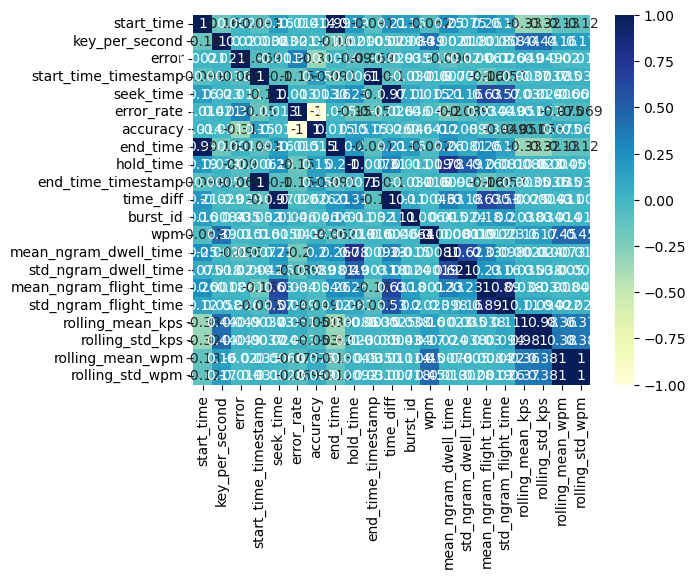

In [17]:
print_correlation(anomaly_data)

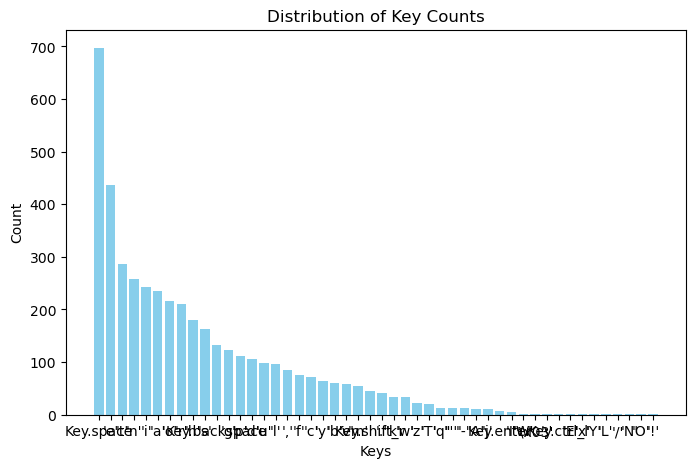

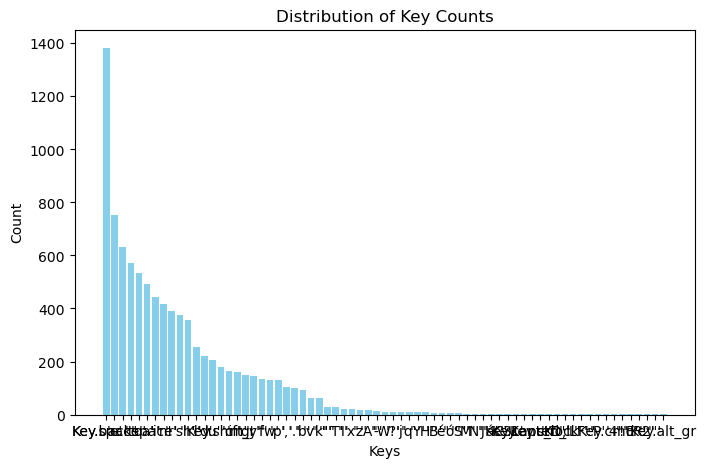

,key,start_time,key_per_second,combination,error,start_time_timestamp,seek_time,error_rate,accuracy,end_time,...,burst_id,wpm,mean_ngram_dwell_time,std_ngram_dwell_time,mean_ngram_flight_time,std_ngram_flight_time,rolling_mean_kps,rolling_std_kps,rolling_mean_wpm,rolling_std_wpm
0,Key.enter,0.000000,1000.000000,NaN,False,1.758045e+09,0.000000,0.000000,1.000000,0.057008,...,0,0.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
1,Key.shift_r,1.163901,1.718359,NaN,False,1.758045e+09,1.106893,0.000000,1.000000,1.622159,...,0,0.000000,0.257633,0.283726,0.553446,0.782691,500.859180,705.891718,0.000000,0.000000
2,'T',1.536538,1.952442,"'T',KEY.SHIFT_R",False,1.758045e+09,0.372637,0.000000,1.000000,1.643228,...,0,0.000000,0.207319,0.218735,0.493176,0.563205,334.556934,576.290612,0.000000,0.000000
3,'h',2.054649,1.946804,NaN,False,1.758045e+09,0.411421,0.000000,1.000000,2.134424,...,0,0.000000,0.214908,0.211177,0.630317,0.413182,251.404401,499.063744,0.000000,0.000000
4,'e',2.548181,1.962184,NaN,False,1.758045e+09,0.413756,0.000000,1.000000,2.623500,...,0,0.000000,0.087262,0.016973,0.399271,0.023096,201.515958,446.366161,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8909,Key.space,8.786724,5.235171,NaN,False,1.761085e+09,0.026694,0.086957,0.913043,8.868474,...,0,54.627866,0.098100,0.015772,0.030906,0.012530,5.172060,0.051363,50.772336,2.343562
8910,'t',8.955638,5.248091,NaN,True,1.761085e+09,0.087164,0.104167,0.895833,9.094560,...,0,53.597523,0.111297,0.028635,0.052952,0.031010,5.200844,0.043538,51.283493,2.672631
8911,Key.backspace,9.416808,5.097269,NaN,False,1.761085e+09,0.322248,0.083333,0.916667,9.519837,...,0,50.972687,0.107900,0.028896,0.145369,0.156137,5.191944,0.060050,51.433648,2.618622
8912,'d',9.536344,5.138238,NaN,False,1.761085e+09,0.016507,0.102041,0.897959,9.677486,...,0,50.333756,0.127698,0.021393,0.141973,0.160070,5.184600,0.064711,51.620931,2.465592


In [18]:
def key_distribution(df):
    # Calculate the value counts
    key_counts = df['key'].value_counts()

    # Plot the distribution
    plt.figure(figsize=(8, 5))
    plt.bar(key_counts.index, key_counts.values, color='skyblue')
    plt.xlabel('Keys')
    plt.ylabel('Count')
    plt.title('Distribution of Key Counts')
    plt.show()
        
    return df

key_distribution(normal_data)
key_distribution(anomaly_data)

In [19]:
def typing_speed_variation(df):
    '''
    Function to check variations in typing speed
    '''
    # Group and calculate standard deviation for `key_per_second`
    variation_in_typing_speed = df.groupby('key')['key_per_second'].std()

    # Add the standard deviation back
    df['variation_in_typing_speed'] = df['key'].map(variation_in_typing_speed)
    
    return df

normal_data = typing_speed_variation(normal_data)
anomaly_data = typing_speed_variation(anomaly_data)

In [20]:
def add_burst_calculation(df):
    '''
    Calculate burst times which we add to the data now
    '''
    # Calculate the interval between consecutive key presses
    df['interval'] = df['start_time'].diff()

    # Define a threshold for bursts
    threshold = 0.1
    df['is_burst'] = df['interval'] <= threshold

    # Assign burst IDs to consecutive keys that fall within the threshold
    burst_id = 0
    burst_ids = []

    for is_burst in df['is_burst']:
        if not is_burst:  # If there's a pause, increment the burst ID
            burst_id += 1
        burst_ids.append(burst_id)

    df['burst_id'] = burst_ids

    # Count the number of bursts
    burst_counts = df['burst_id'].nunique() - 1  # Subtract 1 to exclude the initial NaN burst
    print(f'Number of burst events: {burst_counts}')
    
    return df

normal_data = add_burst_calculation(normal_data)
anomaly_data = add_burst_calculation(anomaly_data)

Number of burst events: 2683
Number of burst events: 7397


                           start_time  key_per_second     error  \
start_time                   1.000000       -0.170483 -0.015125   
key_per_second              -0.170483        1.000000  0.007001   
error                       -0.015125        0.007001  1.000000   
start_time_timestamp         0.224973       -0.012513  0.004983   
seek_time                    0.060696       -0.081386  0.011217   
error_rate                  -0.013553        0.018072  0.290601   
accuracy                     0.013553       -0.018072 -0.290601   
end_time                     0.981988       -0.168906 -0.013169   
hold_time                    0.008901       -0.024278 -0.053714   
end_time_timestamp           0.225399       -0.012467  0.005076   
time_diff                    0.067439       -0.144879  0.010117   
burst_id                     0.028317       -0.000462  0.002914   
wpm                         -0.055104        0.322771 -0.008185   
mean_ngram_dwell_time        0.013022       -0.013629 -0.03812

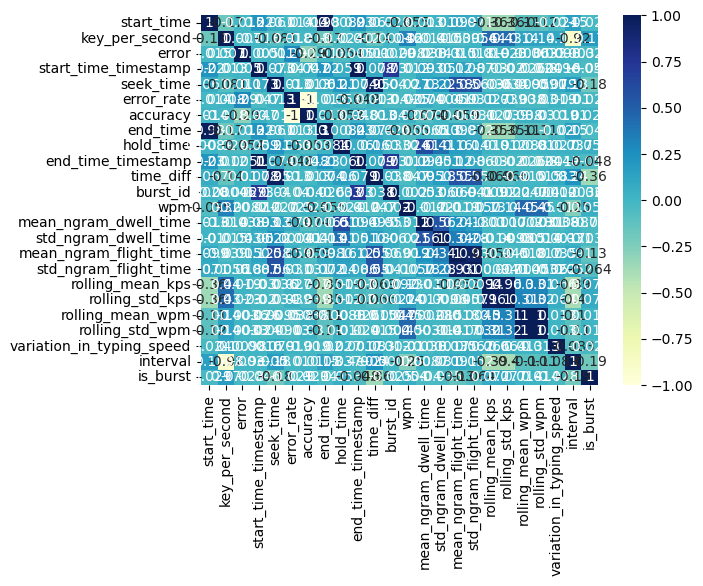

In [21]:
print_correlation(normal_data)

                           start_time  key_per_second     error  \
start_time                   1.000000       -0.161384  0.002136   
key_per_second              -0.161384        1.000000  0.020396   
error                        0.002136        0.020396  1.000000   
start_time_timestamp        -0.091331        0.000362 -0.069315   
seek_time                    0.159901        0.023127 -0.011124   
error_rate                  -0.013557        0.021184  0.313073   
accuracy                     0.013557       -0.021184 -0.313073   
end_time                     0.994286       -0.160625  0.001429   
hold_time                    0.193745        0.021401 -0.089997   
end_time_timestamp          -0.091296        0.000508 -0.069087   
time_diff                    0.206052       -0.029397 -0.029017   
burst_id                     0.077347       -0.007704  0.028382   
wpm                         -0.062066        0.390866 -0.015333   
mean_ngram_dwell_time        0.250672       -0.002124 -0.09588

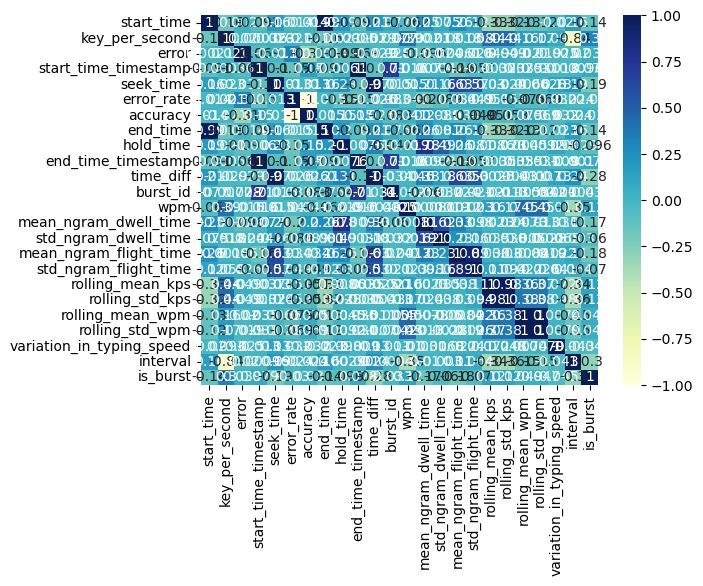

In [22]:
print_correlation(anomaly_data)

In [23]:
combined_df = pd.concat([normal_data, anomaly_data], ignore_index=True)

# Save to CSV
combined_df.to_csv('../Data_Processed/data_processed.csv', index=False)  # remove unnecessary indexing